In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

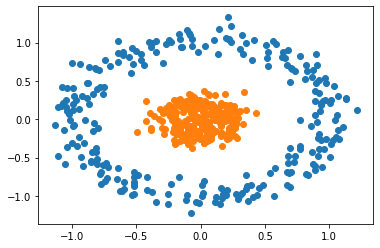

In [4]:
scatter_plot()

In [6]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [12]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [13]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.009851365350186825
epoch: 1 loss: 0.009388192556798458
epoch: 2 loss: 0.008989246562123299
epoch: 3 loss: 0.008551523089408875
epoch: 4 loss: 0.008149637840688229
epoch: 5 loss: 0.007806539535522461
epoch: 6 loss: 0.007485202047973871
epoch: 7 loss: 0.007150681689381599
epoch: 8 loss: 0.006825161632150412
epoch: 9 loss: 0.006530052050948143
epoch: 10 loss: 0.006261518225073814
epoch: 11 loss: 0.006003706716001034
epoch: 12 loss: 0.005752922501415014
epoch: 13 loss: 0.005514419637620449
epoch: 14 loss: 0.005290665198117495
epoch: 15 loss: 0.0050796037539839745
epoch: 16 loss: 0.004878187086433172
epoch: 17 loss: 0.004685514140874147
epoch: 18 loss: 0.004503281787037849
epoch: 19 loss: 0.004333090037107468
epoch: 20 loss: 0.004173961002379656
epoch: 21 loss: 0.0040230597369372845
epoch: 22 loss: 0.0038781692273914814
epoch: 23 loss: 0.0037390117067843676
epoch: 24 loss: 0.003606675425544381
epoch: 25 loss: 0.003482100320979953
epoch: 26 loss: 0.0033649811521172523
epoch:

epoch: 282 loss: 0.00016895764565560967
epoch: 283 loss: 0.0001681001449469477
epoch: 284 loss: 0.00016724839224480093
epoch: 285 loss: 0.0001664081501075998
epoch: 286 loss: 0.00016557352500967681
epoch: 287 loss: 0.0001647432363824919
epoch: 288 loss: 0.00016392255201935768
epoch: 289 loss: 0.00016310893988702446
epoch: 290 loss: 0.0001623032585484907
epoch: 291 loss: 0.00016150159353855997
epoch: 292 loss: 0.00016070996935013682
epoch: 293 loss: 0.00015992099361028522
epoch: 294 loss: 0.00015913881361484528
epoch: 295 loss: 0.00015836588863749057
epoch: 296 loss: 0.00015759617963340133
epoch: 297 loss: 0.00015683331002946943
epoch: 298 loss: 0.0001560779637657106
epoch: 299 loss: 0.0001553273614263162
epoch: 300 loss: 0.00015458109555765986
epoch: 301 loss: 0.00015384267317131162
epoch: 302 loss: 0.0001531112939119339
epoch: 303 loss: 0.00015238502237480134
epoch: 304 loss: 0.00015166332013905048
epoch: 305 loss: 0.0001509472931502387
epoch: 306 loss: 0.00015023871674202383
epoch: 3

epoch: 553 loss: 6.28104608040303e-05
epoch: 554 loss: 6.263817340368405e-05
epoch: 555 loss: 6.246720295166597e-05
epoch: 556 loss: 6.229907739907503e-05
epoch: 557 loss: 6.212891457835212e-05
epoch: 558 loss: 6.195901369210333e-05
epoch: 559 loss: 6.179089541547e-05
epoch: 560 loss: 6.162253703223541e-05
epoch: 561 loss: 6.145500810816884e-05
epoch: 562 loss: 6.129094981588423e-05
epoch: 563 loss: 6.112425762694329e-05
epoch: 564 loss: 6.095816570450552e-05
epoch: 565 loss: 6.0796377510996535e-05
epoch: 566 loss: 6.063231194275431e-05
epoch: 567 loss: 6.047017450327985e-05
epoch: 568 loss: 6.030730583006516e-05
epoch: 569 loss: 6.014836981194094e-05
epoch: 570 loss: 5.9985857660649344e-05
epoch: 571 loss: 5.982442598906346e-05
epoch: 572 loss: 5.966538083157502e-05
epoch: 573 loss: 5.950775812380016e-05
epoch: 574 loss: 5.93487020523753e-05
epoch: 575 loss: 5.919287650613114e-05
epoch: 576 loss: 5.903776400373317e-05
epoch: 577 loss: 5.8881210861727595e-05
epoch: 578 loss: 5.87249087

epoch: 843 loss: 3.257085700170137e-05
epoch: 844 loss: 3.2506952265976e-05
epoch: 845 loss: 3.244579420424998e-05
epoch: 846 loss: 3.238594581489451e-05
epoch: 847 loss: 3.2322761398972943e-05
epoch: 848 loss: 3.226327316951938e-05
epoch: 849 loss: 3.220163853256963e-05
epoch: 850 loss: 3.214143725926988e-05
epoch: 851 loss: 3.208230918971822e-05
epoch: 852 loss: 3.2020430808188394e-05
epoch: 853 loss: 3.196070611011237e-05
epoch: 854 loss: 3.190097777405754e-05
epoch: 855 loss: 3.184136949130334e-05
epoch: 856 loss: 3.17800986522343e-05
epoch: 857 loss: 3.172096694470383e-05
epoch: 858 loss: 3.1662435503676534e-05
epoch: 859 loss: 3.1599727662978694e-05
epoch: 860 loss: 3.154464502586052e-05
epoch: 861 loss: 3.148503674310632e-05
epoch: 862 loss: 3.142685818602331e-05
epoch: 863 loss: 3.13686796289403e-05
epoch: 864 loss: 3.130990808131173e-05
epoch: 865 loss: 3.1251725886249915e-05
epoch: 866 loss: 3.1191757443593815e-05
epoch: 867 loss: 3.11353724100627e-05
epoch: 868 loss: 3.10791

Text(0.5, 0, 'epoch')

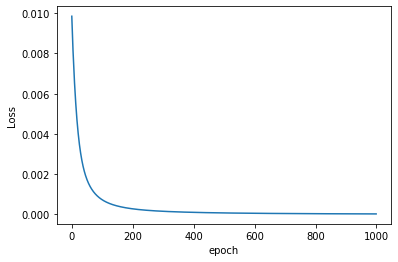

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [37]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
  

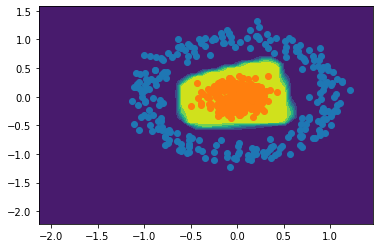

In [38]:
plot_decision_boundary(X, y)
scatter_plot()

In [ ]:
x = 0.025
y = 0.025
point = torch.Tensor([])